### 处理数据集
- 将yes/no转换成1/0
#### 大类

In [1]:
import pandas as pd
import numpy as np
LargeClass = pd.read_csv("..\\dataset\\train_dataset_metric_by_me\\LargeClass_YesNo.csv")
LargeClass = LargeClass.drop(columns=['Kind','lineno','class_name'])
LargeClass.loc[LargeClass["smell"]=='yes','smell'] = '1'
LargeClass.loc[LargeClass["smell"]=='no','smell'] = '0'

LargeClass

,degree,neighbors_count,in_degree,out_degree,self_loops,nodes_inherit,nodes_inherited,nodes_aggregate,nodes_aggregated,nodes_combinate,nodes_combinated,CLOC,NOA,NOM,smell
0,3,0,3,0,0,0,0,0,0,0,3,192.0,0.0,10.0,0
1,4,0,4,0,0,0,2,0,0,0,2,826.0,0.0,36.0,1
2,4,1,3,1,0,0,2,0,0,1,1,3.0,0.0,0.0,0
3,3,1,2,1,0,1,0,0,0,0,2,111.0,0.0,8.0,0
4,2,2,0,2,0,1,0,0,0,1,0,34.0,0.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,1.0,0
297,0,0,0,0,0,0,0,0,0,0,0,200.0,1.0,2.0,0
298,1,0,1,0,0,0,0,0,0,0,1,1947.0,6.0,52.0,1
299,1,1,0,1,0,1,0,0,0,0,0,15.0,3.0,0.0,0


#### 长方法

In [2]:
LongMethod = pd.read_csv("..\\dataset\\train_dataset_metric_by_me\\LongMethod_YesNo.csv")
LongMethod = LongMethod.drop(columns=['Kind','lineno','function_name'])
LongMethod.loc[LongMethod["smell"]=='yes','smell'] = '1'
LongMethod.loc[LongMethod["smell"]=='no','smell'] = '0'

LongMethod

,degree,neighbors_count,in_degree,out_degree,self_loops,max_call_circles,MLOC,PAR,DOC,smell
0,3,2,1,2,0,0,70.0,1.0,0.0,0
1,4,3,1,3,0,0,21.0,1.0,0.0,0
2,3,1,2,1,0,0,31.0,1.0,0.0,0
3,48,2,46,2,0,0,28.0,2.0,0.0,0
4,2,2,0,2,0,0,14.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
202,5,3,2,3,0,0,155.0,2.0,0.0,1
203,3,2,1,2,0,0,20.0,7.0,0.0,0
204,3,3,0,3,0,0,326.0,2.0,0.0,1
205,6,6,0,6,0,0,238.0,3.0,0.0,1


#### 长参数列

In [3]:
LongParameterList = pd.read_csv("..\\dataset\\train_dataset_metric_by_me\\LongParameterList_YesNo.csv")
LongParameterList = LongParameterList.drop(columns=['Kind','lineno','function_name'])
LongParameterList.loc[LongParameterList["smell"]=='yes','smell'] = '1'
LongParameterList.loc[LongParameterList["smell"]=='no','smell'] = '0'

LongParameterList

,degree,neighbors_count,in_degree,out_degree,self_loops,max_call_circles,MLOC,PAR,DOC,smell
0,6,3,3,3,0,0,13.0,3.0,0.0,0
1,7,0,7,0,0,0,2.0,3.0,0.0,0
2,1,0,1,0,0,0,2.0,4.0,0.0,0
3,1,1,0,1,0,0,6.0,4.0,0.0,0
4,4,1,3,1,1,1,1.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
175,4,3,1,3,0,0,20.0,5.0,0.0,1
176,1,0,1,0,0,0,26.0,5.0,0.0,1
177,3,3,0,3,0,0,27.0,9.0,0.0,1
178,2,1,1,1,1,1,8.0,5.0,0.0,1


#### 长作用域链

In [4]:
LongScopeChaining = pd.read_csv("..\\dataset\\train_dataset_metric_by_me\\LongScopeChaining_YesNo.csv")
LongScopeChaining = LongScopeChaining.drop(columns=['Kind','lineno','function_name'])
LongScopeChaining.loc[LongScopeChaining["smell"]=='yes','smell'] = '1'
LongScopeChaining.loc[LongScopeChaining["smell"]=='no','smell'] = '0'

LongScopeChaining

,degree,neighbors_count,in_degree,out_degree,self_loops,max_call_circles,MLOC,PAR,DOC,smell
0,5,5,0,5,0,0,3.0,1.0,3.0,0
1,7,3,4,3,0,0,8.0,2.0,3.0,0
2,7,7,0,7,0,0,3.0,1.0,3.0,0
3,3,3,0,3,0,0,3.0,1.0,3.0,0
4,7,3,4,3,0,0,6.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...
64,1,1,0,1,0,0,6.0,1.0,5.0,1
65,1,1,0,1,0,0,0.0,0.0,0.0,1
66,1,1,0,1,0,0,0.0,0.0,0.0,1
67,1,1,0,1,0,0,0.0,0.0,0.0,1


### 拆分训练集（X）以及结果集（Y）
#### 大类

In [5]:
LargeClassX = LargeClass.iloc[:,:-1].to_numpy()
LargeClassY = LargeClass.iloc[:,-1:].to_numpy().flatten()

print(LargeClass.columns)
print(LargeClassX.shape, LargeClassY.shape)

Index(['degree', 'neighbors_count', 'in_degree', 'out_degree', 'self_loops',
       'nodes_inherit', 'nodes_inherited', 'nodes_aggregate',
       'nodes_aggregated', 'nodes_combinate', 'nodes_combinated', 'CLOC',
       'NOA', 'NOM', 'smell'],
      dtype='object')
(301, 14) (301,)


#### 长方法

In [6]:
LongMethodX = LongMethod.iloc[:,:-1].to_numpy()
LongMethodY = LongMethod.iloc[:,-1:].to_numpy().flatten()

print(LongMethod.columns)
print(LongMethodX.shape, LongMethodY.shape)

Index(['degree', 'neighbors_count', 'in_degree', 'out_degree', 'self_loops',
       'max_call_circles', 'MLOC', 'PAR', 'DOC', 'smell'],
      dtype='object')
(207, 9) (207,)


#### 长参数列

In [7]:
LongParameterListX = LongParameterList.iloc[:,:-1].to_numpy()
LongParameterListY = LongParameterList.iloc[:,-1:].to_numpy().flatten()

print(LongParameterList.columns)
print(LongParameterListX.shape, LongParameterListY.shape)

Index(['degree', 'neighbors_count', 'in_degree', 'out_degree', 'self_loops',
       'max_call_circles', 'MLOC', 'PAR', 'DOC', 'smell'],
      dtype='object')
(180, 9) (180,)


#### 长作用域链

In [8]:
LongScopeChainingX = LongScopeChaining.iloc[:,:-1].to_numpy()
LongScopeChainingY = LongScopeChaining.iloc[:,-1:].to_numpy().flatten()

print(LongScopeChaining.columns)
print(LongScopeChainingX.shape, LongScopeChainingY.shape)

Index(['degree', 'neighbors_count', 'in_degree', 'out_degree', 'self_loops',
       'max_call_circles', 'MLOC', 'PAR', 'DOC', 'smell'],
      dtype='object')
(69, 9) (69,)


### 大类训练

d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


-------------------------------------RandomForest----------------------------------------
precision: 0.6675
recall: 0.41
f-score: 0.4730555555555556


d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


---------------------------------------SVC--------------------------------------
precision: 0.6583333333333333
recall: 0.305
f-score: 0.3894047619047619
-------------------------------------NB----------------------------------------
precision: 0.24881331087213437
recall: 0.5349999999999999
f-score: 0.36802211677211677


d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

-------------------------------------LR----------------------------------------
precision: 0.63
recall: 0.4425
f-score: 0.503095238095238
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variab

-------------------------------------CNN----------------------------------------
1维卷积:
precision: 0.2160036945812808
recall: 0.5025000000000001
f-score: 0.23740220134182982
2维卷积:
precision: 0.13693578643578644
recall: 0.385
f-score: 0.21226021611924248


d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df),palette="Pastel1")


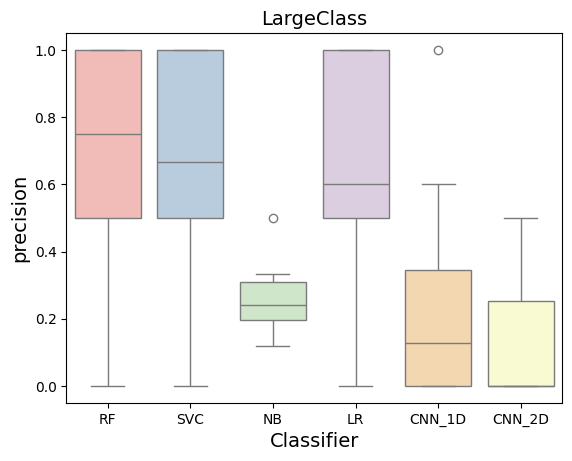

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot2 = sns.boxplot(x="variable", y="value", data=pd.melt(df2),palette="Pastel1")


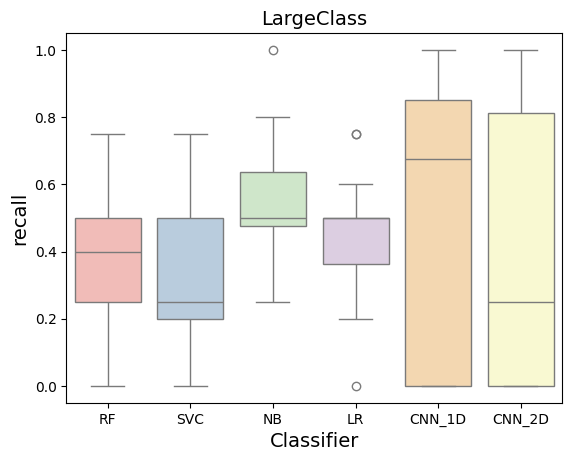

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot3 = sns.boxplot(x="variable", y="value", data=pd.melt(df3),palette="Pastel1")


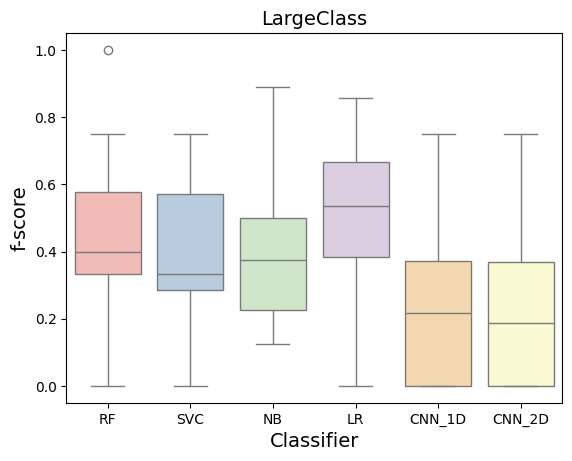

In [9]:
from model_train_function  import model_train_function 
lc_scores,lc_result = model_train_function('LargeClass',LargeClassX,LargeClassY)

### 长方法训练

-------------------------------------RandomForest----------------------------------------
precision: 0.9583333333333333
recall: 0.6708333333333332
f-score: 0.7501190476190477


d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


---------------------------------------SVC--------------------------------------
precision: 0.8375
recall: 0.6083333333333333
f-score: 0.6661904761904762
-------------------------------------NB----------------------------------------
precision: 0.23159229659229658
recall: 0.7249999999999999
f-score: 0.341523141890789


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


-------------------------------------LR----------------------------------------
precision: 0.85
recall: 0.7125
f-score: 0.6597222222222222
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variab

-------------------------------------CNN----------------------------------------
1维卷积:
precision: 0.16607142857142856
recall: 0.3875
f-score: 0.07153846153846155
2维卷积:
precision: 0.12504459699152795
recall: 0.3333333333333333
f-score: 0.08899261153736857


d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df),palette="Pastel1")


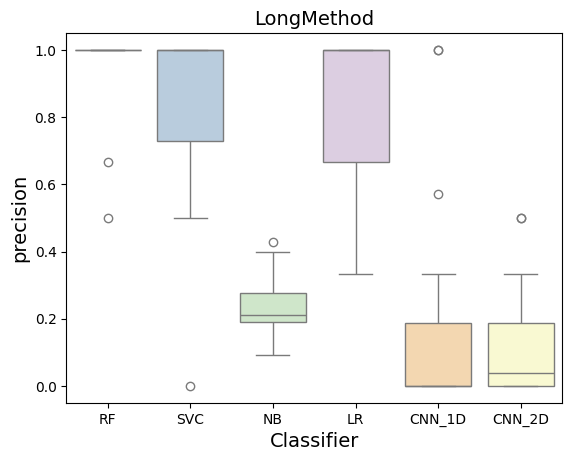

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot2 = sns.boxplot(x="variable", y="value", data=pd.melt(df2),palette="Pastel1")


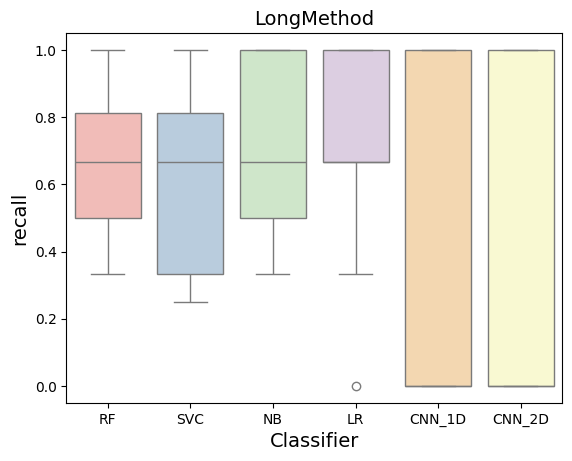

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot3 = sns.boxplot(x="variable", y="value", data=pd.melt(df3),palette="Pastel1")


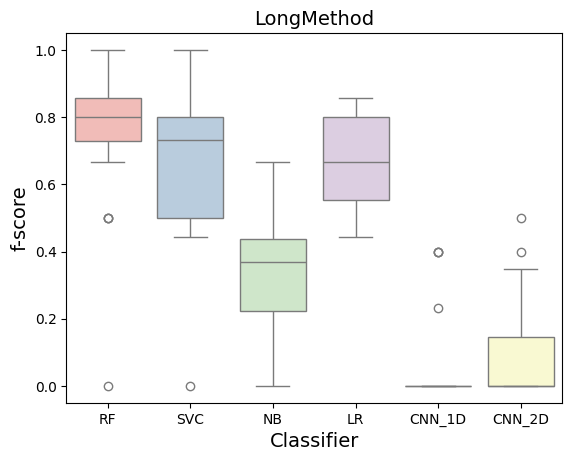

In [10]:
lm_scores,lm_result = model_train_function('LongMethod',LongMethodX,LongMethodY)

### 长参数列训练

-------------------------------------RandomForest----------------------------------------
precision: 0.8278571428571428
recall: 0.7566666666666667
f-score: 0.8031693306693306
---------------------------------------SVC--------------------------------------
precision: 0.99
recall: 0.7616666666666667
f-score: 0.8467929292929293
-------------------------------------NB----------------------------------------
precision: 0.309033189033189
recall: 0.35333333333333333
f-score: 0.3195682095682095


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


-------------------------------------LR----------------------------------------
precision: 0.9446428571428573
recall: 0.7383333333333334
f-score: 0.8242279942279941
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error

-------------------------------------CNN----------------------------------------
1维卷积:
precision: 0.10297619047619047
recall: 0.06333333333333332
f-score: 0.04628639334521688
2维卷积:
precision: 0.07121212121212121
recall: 0.05166666666666667
f-score: 0.01


d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df),palette="Pastel1")


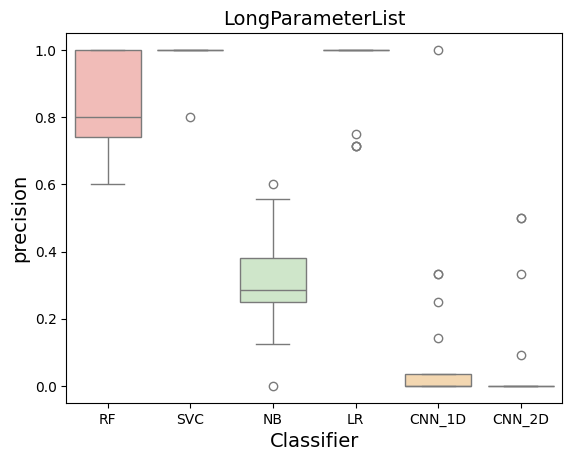

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot2 = sns.boxplot(x="variable", y="value", data=pd.melt(df2),palette="Pastel1")


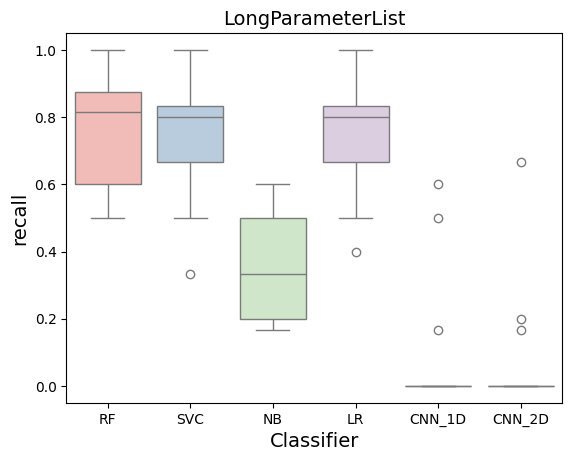

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot3 = sns.boxplot(x="variable", y="value", data=pd.melt(df3),palette="Pastel1")


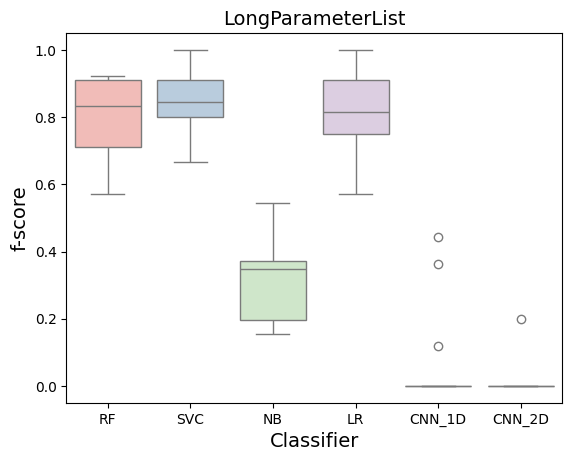

In [11]:
lpl_scores,lpl_result = model_train_function('LongParameterList',LongParameterListX,LongParameterListY)

### 长作用域链训练

-------------------------------------RandomForest----------------------------------------
precision: 0.9833333333333332
recall: 0.7999999999999999
f-score: 0.8783333333333335


d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_clas

---------------------------------------SVC--------------------------------------
precision: 0.35
recall: 0.2125
f-score: 0.26666666666666666


d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


-------------------------------------NB----------------------------------------
precision: 0.3708333333333333
recall: 0.24999999999999994
f-score: 0.28309523809523807


d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_clas

-------------------------------------LR----------------------------------------
precision: 0.24166666666666664
recall: 0.14583333333333331
f-score: 0.19166666666666668
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error

-------------------------------------CNN----------------------------------------
1维卷积:
precision: 0.15
recall: 0.15
f-score: 0.12666666666666665
2维卷积:
precision: 0.17916666666666664
recall: 0.1125
f-score: 0.22111111111111112


d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df),palette="Pastel1")


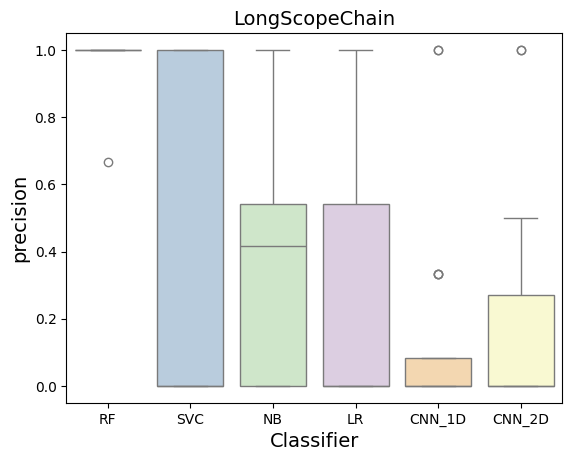

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot2 = sns.boxplot(x="variable", y="value", data=pd.melt(df2),palette="Pastel1")


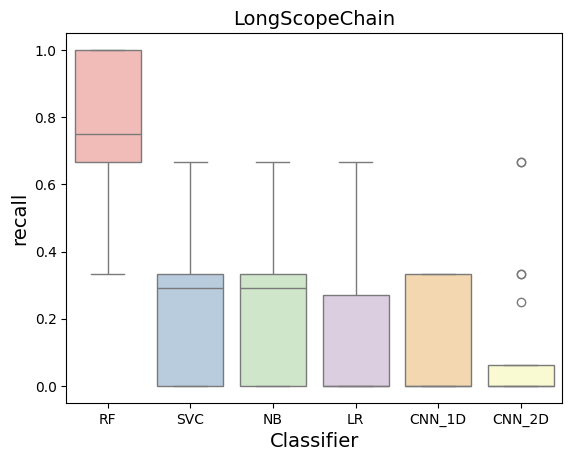

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot3 = sns.boxplot(x="variable", y="value", data=pd.melt(df3),palette="Pastel1")


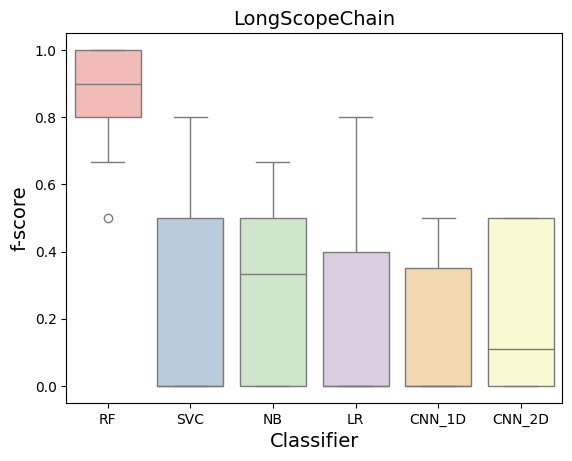

In [12]:
lsc_scores,lsc_result = model_train_function('LongScopeChain',LongScopeChainingX,LongScopeChainingY)

In [13]:
print("大类分数：")
df_lc = []
for val1 in lc_scores.values():
    rows = []
    for val2 in val1.values():
        rows.append(val2)
    df_lc.append(rows)
df_lc = pd.DataFrame(df_lc,columns=['precision','recall','f1'],index=['rf','svc','nb','lr','cnn_1D','cnn_2D'])
df_lc

大类分数：


,precision,recall,f1
rf,0.667500,0.4100,0.473056
svc,0.658333,0.3050,0.389405
nb,0.248813,0.5350,0.368022
lr,0.630000,0.4425,0.503095
cnn_1D,0.216004,0.5025,0.237402
cnn_2D,0.136936,0.3850,0.212260


In [14]:
print("长方法分数：")
df_lm = []
for val1 in lm_scores.values():
    rows = []
    for val2 in val1.values():
        rows.append(val2)
    df_lm.append(rows)
df_lm = pd.DataFrame(df_lm,columns=['precision','recall','f1'],index=['rf','svc','nb','lr','cnn_1D','cnn_2D'])
df_lm

长方法分数：


,precision,recall,f1
rf,0.958333,0.670833,0.750119
svc,0.837500,0.608333,0.666190
nb,0.231592,0.725000,0.341523
lr,0.850000,0.712500,0.659722
cnn_1D,0.166071,0.387500,0.071538
cnn_2D,0.125045,0.333333,0.088993


In [15]:
print("长参数列分数：")
df_lpl = []
for val1 in lpl_scores.values():
    rows = []
    for val2 in val1.values():
        rows.append(val2)
    df_lpl.append(rows)
df_lpl = pd.DataFrame(df_lpl,columns=['precision','recall','f1'],index=['rf','svc','nb','lr','cnn_1D','cnn_2D'])
df_lpl

长参数列分数：


,precision,recall,f1
rf,0.827857,0.756667,0.803169
svc,0.990000,0.761667,0.846793
nb,0.309033,0.353333,0.319568
lr,0.944643,0.738333,0.824228
cnn_1D,0.102976,0.063333,0.046286
cnn_2D,0.071212,0.051667,0.010000


In [16]:
print("长作用域链分数：")
df_lsc = []
for val1 in lsc_scores.values():
    rows = []
    for val2 in val1.values():
        rows.append(val2)
    df_lsc.append(rows)
df_lsc = pd.DataFrame(df_lsc,columns=['precision','recall','f1'],index=['rf','svc','nb','lr','cnn_1D','cnn_2D'])
df_lsc

长作用域链分数：


,precision,recall,f1
rf,0.983333,0.800000,0.878333
svc,0.350000,0.212500,0.266667
nb,0.370833,0.250000,0.283095
lr,0.241667,0.145833,0.191667
cnn_1D,0.150000,0.150000,0.126667
cnn_2D,0.179167,0.112500,0.221111
